In [1]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# On charge le dataset
house_data = pd.read_csv('house_data.csv')

#On clean le data set.
House_data = house_data.dropna()

#reduction des données
House_data = House_data[House_data['price'] < 10000]

#la tronche des données
House_data.head()



,price,surface,arrondissement
0,1820,46.1,1.0
1,1750,41.0,1.0
2,1900,55.0,1.0
3,1950,46.0,1.0
4,1950,49.0,1.0


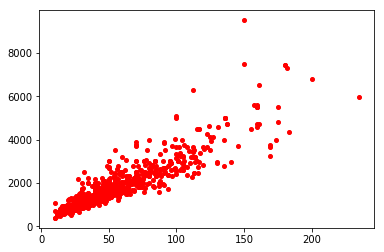

In [1]:
# On affiche le nuage de points dont on dispose
plt.plot(House_data['surface'], House_data['price'], 'ro', markersize=4)
plt.show()

In [2]:
# On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
x = House_data['surface']
y = House_data['price']
z = House_data['arrondissement']

X = np.array(x).reshape((-1, 1))
Y = np.array(y)
Z = np.array(z)

#X = house_data([house_data['surface']]).reshape((-1, 1))
#Y = house_data([house_data['price']])

#X.reshape(1, -1)

In [3]:
#on partage les données en 2 jeux de train et test
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=0.8)

C:\Users\Richard\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
#regression linéaire à 2 features : notre scénario de base
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)

#le petit b:
print(regr.intercept_)
#le petit a:
print(regr.coef_)


239.63326800459026
[29.2652254]


In [5]:
ypred = regr.predict(xtest)

df = pd.DataFrame({'Actual': ytest.flatten(), 'Predicted': ypred.flatten()})
df.head()


,Actual,Predicted
0,2500,2288.199046
1,1400,1501.549787
2,3000,1702.894538
3,3000,3195.421033
4,2480,2580.851300


In [6]:
#Qualité de la régression : coefficents
print('Coefficients: \n', regr.coef_)

#RMSE
print("Mean squared error: %.2f"
      % mean_squared_error(ytest, ypred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ytest, ypred))



Coefficients: 
 [29.2652254]
Mean squared error: 310722.67
Variance score: 0.74


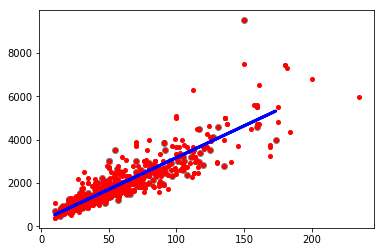

In [7]:
#Qualité de la régression : graph
plt.scatter(xtest, ytest,  color='gray')
plt.plot(House_data['surface'], House_data['price'], 'ro', markersize=4)
plt.plot(xtest, ypred, color='blue', linewidth=3)
plt.show()



C:\Users\Richard\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


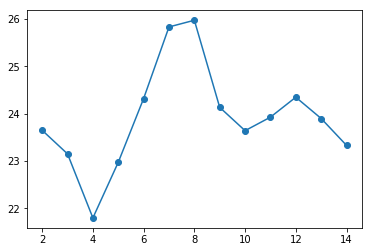

le nombre de voisin optimal est de 7 pour ce jeu de données et cet essai


AttributeError: 'KNeighborsRegressor' object has no attribute 'coef_'

In [8]:
#Scénario alternatif 1 : On tente un KNN régrésseur

#Le jeu de données reste le même.
#Je garde les jeux que précédement

#La bibliothèque dont on a besoin : KNN regresseur
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

x = House_data['surface']
y = House_data['price']

Xknn = np.array(x).reshape((-1, 1))
Yknn = np.array(y)

#on partage les données en 2 jeux de train et test
from sklearn.model_selection import train_test_split

xknn_train, xknn_test, yknn_train, yknn_test = train_test_split(Xknn, Yknn, train_size=0.8)

#on cherche le nombre de voisins optimal (script à désactiver ensuite)


errors = []
for k in range(2,15):
    knnTEST = neighbors.KNeighborsRegressor(k)
    errors.append(100*(1 - knnTEST.fit(xknn_train, yknn_train).score(xknn_test, yknn_test)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

#le nombre de voisin optimal est de 7 pour ce jeu de données et cet essai
print('le nombre de voisin optimal est de 7 pour ce jeu de données et cet essai')

from sklearn.neighbors import KNeighborsRegressor
# un KNN avec 7 voisins
knn = KNeighborsRegressor(n_neighbors=7)
# On créé le modèle avec les données d'entrainement
knn.fit(xknn_train, yknn_train)
# Et on prédit
predictions = knn.predict(xknn_test)

yknn_pred = regr.predict(xknn_test)

df2 = pd.DataFrame({'Actual': yknn_test.flatten(), 'Predicted': yknn_pred.flatten()})
df2.head()

#Qualité de la régression : coefficents
print('Coefficients: \n', knn.coef_)

#RMSE
print("Mean squared error: %.2f"
      % mean_squared_error(yknn_test, yknn_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(yknn_test, yknn_pred))

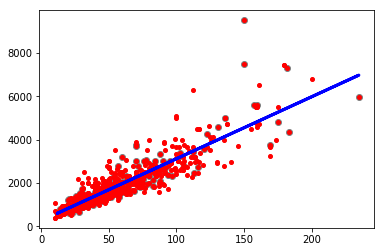

In [13]:
#Qualité de la régression knn : graph
plt.scatter(xknn_test, yknn_test,  color='gray')
plt.plot(House_data['surface'], House_data['price'], 'ro', markersize=4)
plt.plot(xknn_test, yknn_pred, color='blue', linewidth=3)
plt.show()



Mean squared error: 212282.56
Variance score: 0.83


C:\Users\Richard\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


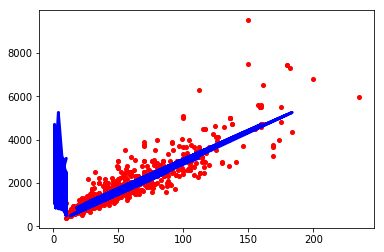

In [21]:
#Scénario alternatif 2 : SVM sur toutes les données

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVR

#On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
xSVR = House_data[['surface', 'arrondissement']]
ySVR = House_data['price']

XSVR = np.array(xSVR).reshape((-1, 1))
YSVR = np.array(ySVR)

#on partage les données en 2 jeux de train et test
from sklearn.model_selection import train_test_split

xSVR_train, xSVR_test, ySVR_train, ySVR_test = train_test_split(xSVR, ySVR, train_size=0.8)

#on lance la SVM
from sklearn.svm import SVR
svmregressor = SVR(kernel='linear')
svmregressor.fit(xSVR_train, ySVR_train)
ySVR_pred = svmregressor.predict(xSVR_test)


#df3 = pd.DataFrame({'Actual': ySVR_test.flatten(), 'Predicted': ySVR_pred.flatten()})
#df3.head()

#RMSE
print("Mean squared error: %.2f"
      % mean_squared_error(ySVR_test, ySVR_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ySVR_test, ySVR_pred))

#Qualité de la régression knn : graph
plt.plot(House_data['surface'], House_data['price'], 'ro', markersize=4)
plt.plot(xSVR_test, ySVR_pred, color='blue', linewidth=3)
plt.show()


#lE GRAPH EST FOIREUX...







In [22]:
#Scénario alternatif 3, pour le bonus : régression linéaire multiple, sur toutes les données

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

#On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
xRLM = House_data[['surface', 'arrondissement']]
yRLM = House_data['price']

XRLM = np.array(xRLM).reshape((-1, 1))
YRLM = np.array(yRLM)

#on partage les données en 2 jeux de train et test
from sklearn.model_selection import train_test_split

xRLM_train, xRLM_test, yRLM_train, yRLM_test = train_test_split(xRLM, yRLM, train_size=0.8)

#on lance la RLM
regr = linear_model.LinearRegression()
regr.fit(xRLM_train, yRLM_train)

#le petit b:
print(regr.intercept_)
#le petit a:
print(regr.coef_)

#on prédit
yRLM_pred = regr.predict(xRLM_test)

#Qualité de la régression : coefficents
print('Coefficients: \n', regr.coef_)

#RMSE
print("Mean squared error: %.2f"
      % mean_squared_error(yRLM_test, yRLM_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(yRLM_test, yRLM_pred))





472.57419446810127
[ 28.68114519 -47.41152939]
Coefficients: 
 [ 28.68114519 -47.41152939]
Mean squared error: 167837.10
Variance score: 0.88


C:\Users\Richard\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [23]:
#Résumé :
#On évalue les performances des modèles par le R2 et la RMSE.
#Le meilleur R2 est celui le plus proche de 1, la RMSE doit etre la plus petite possible.


print('Modèle de base : régression linéaire')

#RMSE
print("Mean squared error: %.2f"
      % mean_squared_error(ytest, ypred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ytest, ypred))


print('Modèle alternatif 1 : KNN régresseur')
#RMSE
print("Mean squared error: %.2f"
      % mean_squared_error(yknn_test, yknn_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(yknn_test, yknn_pred))


print('Modèle alternatif 2 : SVM régresseur')
#RMSE
print("Mean squared error: %.2f"
      % mean_squared_error(ySVR_test, ySVR_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ySVR_test, ySVR_pred))

print('Modèle alternatif 3 : Régression linéaire multiple')
#RMSE
print("Mean squared error: %.2f"
      % mean_squared_error(yRLM_test, yRLM_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(yRLM_test, yRLM_pred))


print('A force de répéter (la sélection des jeux de test et entrainement est aléatoire), on voit que la Régression linéaire multiple se ditingue, de peu. Le régresseur KNN à 7 voisins semble le moins performant. Le régresseur SVM avec les 3 tables de données est moins précis, mais sera plus utile. Autres algos pouvant etre tentés : PCR, PLS, et KNN régresseur multiple')

Modèle de base : régression linéaire
Mean squared error: 246463.78
Variance score: 0.83
Modèle alternatif 1 : KNN régresseur
Mean squared error: 385696.66
Variance score: 0.79
Modèle alternatif 2 : SVM régresseur
Mean squared error: 212282.56
Variance score: 0.83
Modèle alternatif 3 : Régression linéaire multiple
Mean squared error: 167837.10
Variance score: 0.88
A force de répéter (la sélection des jeux de test et entrainement est aléatoire), on voit que la Régression linéaire multiple se ditingue, de peu. Le régresseur KNN à 7 voisins semble le moins performant. Le régresseur SVM avec les 3 tables de données est moins précis, mais sera plus utile. Autres algos pouvant etre tentés : PCR, PLS, et KNN régresseur multiple
